# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

%matplotlib inline

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
# 🔧 Basic functions
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
snake_columns(websites)

In [5]:
open_data(websites)

Data shape is (1781, 21).

url                           object
url_length                     int64
number_special_characters      int64
charset                       object
server                        object
content_length               float64
whois_country                 object
whois_statepro                object
whois_regdate                 object
whois_updated_date            object
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
app_bytes                      int64
source_app_packets             int64
remote_app_packets             int64
source_app_bytes               int64
remote_app_bytes               int64
app_packets                    int64
dns_query_times              float64
type                           int64
dtype: object

Data row sample and full columns:


,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
1553,B0_508,87,14,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,KS,7/07/1997 0:00,5/07/2016 0:00,17,6,10,1457,21,20,2112,1781,21,4.0,0
421,M0_44,39,9,ISO-8859-1,Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL...,2516.0,US,Utah,24/05/2000 0:00,25/05/2016 0:00,20,0,2,2976,26,23,7783,3440,26,6.0,1
1602,B0_185,95,19,ISO-8859-1,nginx,162.0,NaN,NaN,17/10/2008 0:00,24/03/2017 0:00,12,2,3,1316,14,22,16475,1468,14,2.0,0
61,B0_2224,25,6,UTF-8,LiteSpeed,NaN,NaN,NaN,27/01/2005 0:00,15/11/2013 0:00,6,5,2,564,6,7,442,564,6,0.0,0
1630,M4_14,100,20,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1


In [6]:
df = websites.copy()

In [7]:
df.nunique().sort_values(ascending=False)

url                          1781
whois_regdate                 890
source_app_bytes              885
app_bytes                     825
remote_app_bytes              822
content_length                637
whois_updated_date            593
server                        238
whois_statepro                181
url_length                    142
remote_app_packets            116
app_packets                   113
source_app_packets            113
tcp_conversation_exchange     103
dist_remote_tcp_port           66
whois_country                  48
number_special_characters      31
remote_ips                     18
dns_query_times                10
charset                         8
type                            2
dtype: int64

In [8]:
df.duplicated().value_counts()

False    1781
Name: count, dtype: int64

In [9]:
df.eq(" ").sum()

url                          0
url_length                   0
number_special_characters    0
charset                      0
server                       0
content_length               0
whois_country                0
whois_statepro               0
whois_regdate                0
whois_updated_date           0
tcp_conversation_exchange    0
dist_remote_tcp_port         0
remote_ips                   0
app_bytes                    0
source_app_packets           0
remote_app_packets           0
source_app_bytes             0
remote_app_bytes             0
app_packets                  0
dns_query_times              0
type                         0
dtype: int64

# Challenge 3 - Handle Missing Values
## (Challenge 3 moved here because has no sense to deal with it later)

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [10]:
df.shape[0]

1781

In [11]:
df.isnull().sum()

url                            0
url_length                     0
number_special_characters      0
charset                        7
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [12]:
df.drop("content_length", axis=1, inplace=True)

In [13]:
df.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [14]:
df.isnull().sum()

url                          0
url_length                   0
number_special_characters    0
charset                      0
server                       0
whois_country                0
whois_statepro               0
whois_regdate                0
whois_updated_date           0
tcp_conversation_exchange    0
dist_remote_tcp_port         0
remote_ips                   0
app_bytes                    0
source_app_packets           0
remote_app_packets           0
source_app_bytes             0
remote_app_bytes             0
app_packets                  0
dns_query_times              0
type                         0
dtype: int64

In [15]:
num = df.select_dtypes("number")
cat = df.select_dtypes(exclude="number")

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [16]:
num.corrwith(num["type"]).sort_values(ascending=False)

type                         1.000000
number_special_characters    0.393000
url_length                   0.319322
app_bytes                   -0.013130
remote_app_bytes            -0.013204
dns_query_times             -0.024553
source_app_bytes            -0.044040
remote_app_packets          -0.045576
tcp_conversation_exchange   -0.053738
source_app_packets          -0.054205
app_packets                 -0.054205
dist_remote_tcp_port        -0.073506
remote_ips                  -0.149791
dtype: float64

In [17]:
num_corr = num.corr().round(2)

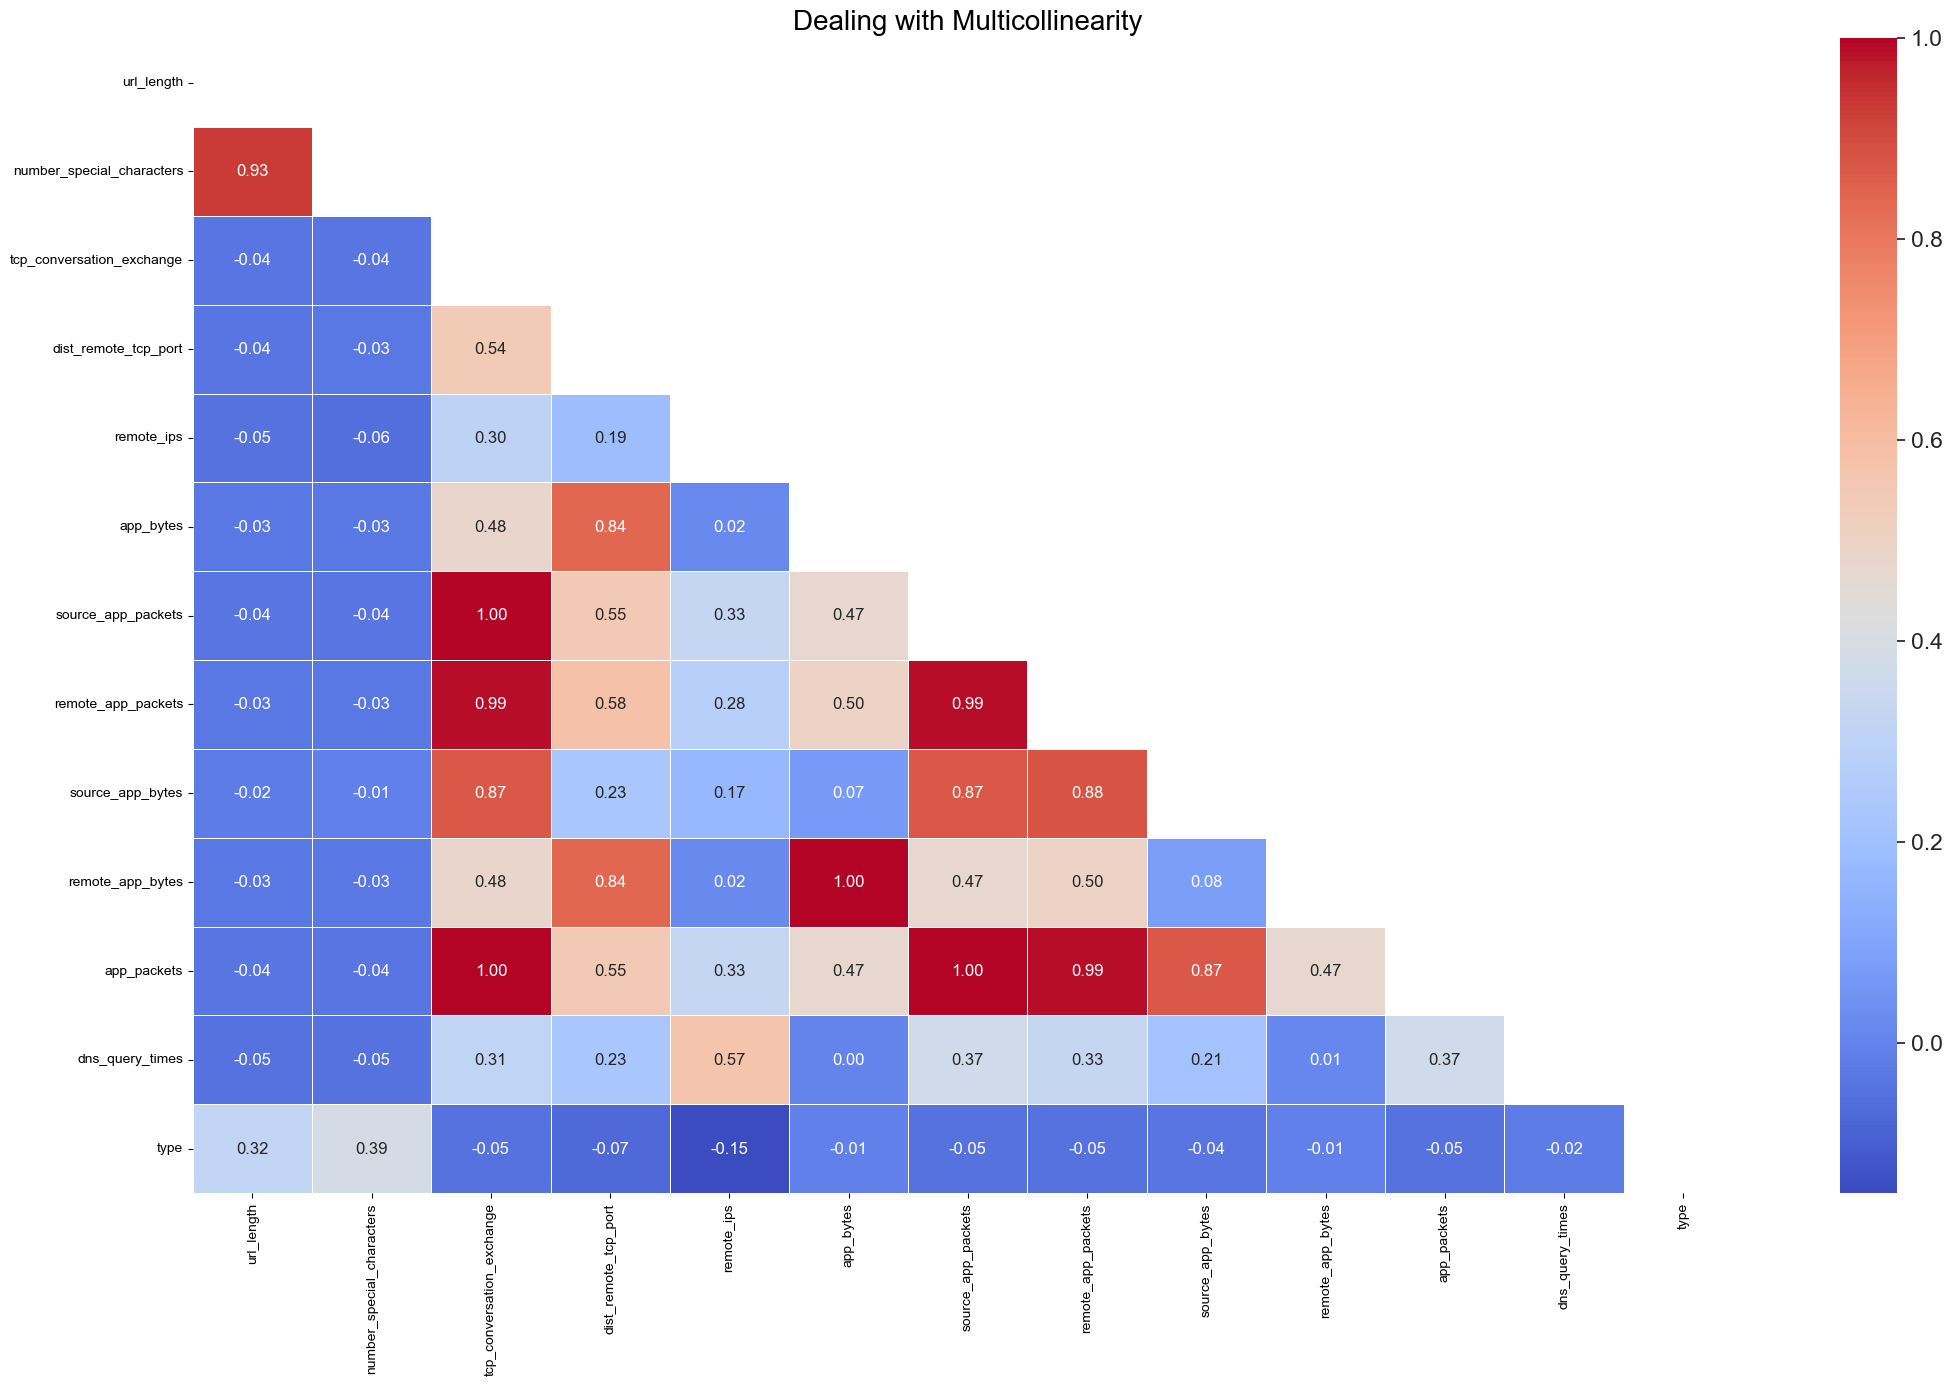

In [18]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [19]:
num.shape

(1257, 13)

In [20]:
num.columns

Index(['url_length', 'number_special_characters', 'tcp_conversation_exchange',
       'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

In [21]:
num_wo_col = num.drop(columns=["app_packets", "source_app_bytes","remote_app_packets","source_app_packets","app_bytes", "url_length"])

In [22]:
num_wo_col.shape

(1257, 7)

In [23]:
num_wo_col_corr = num_wo_col.corr().round(2)

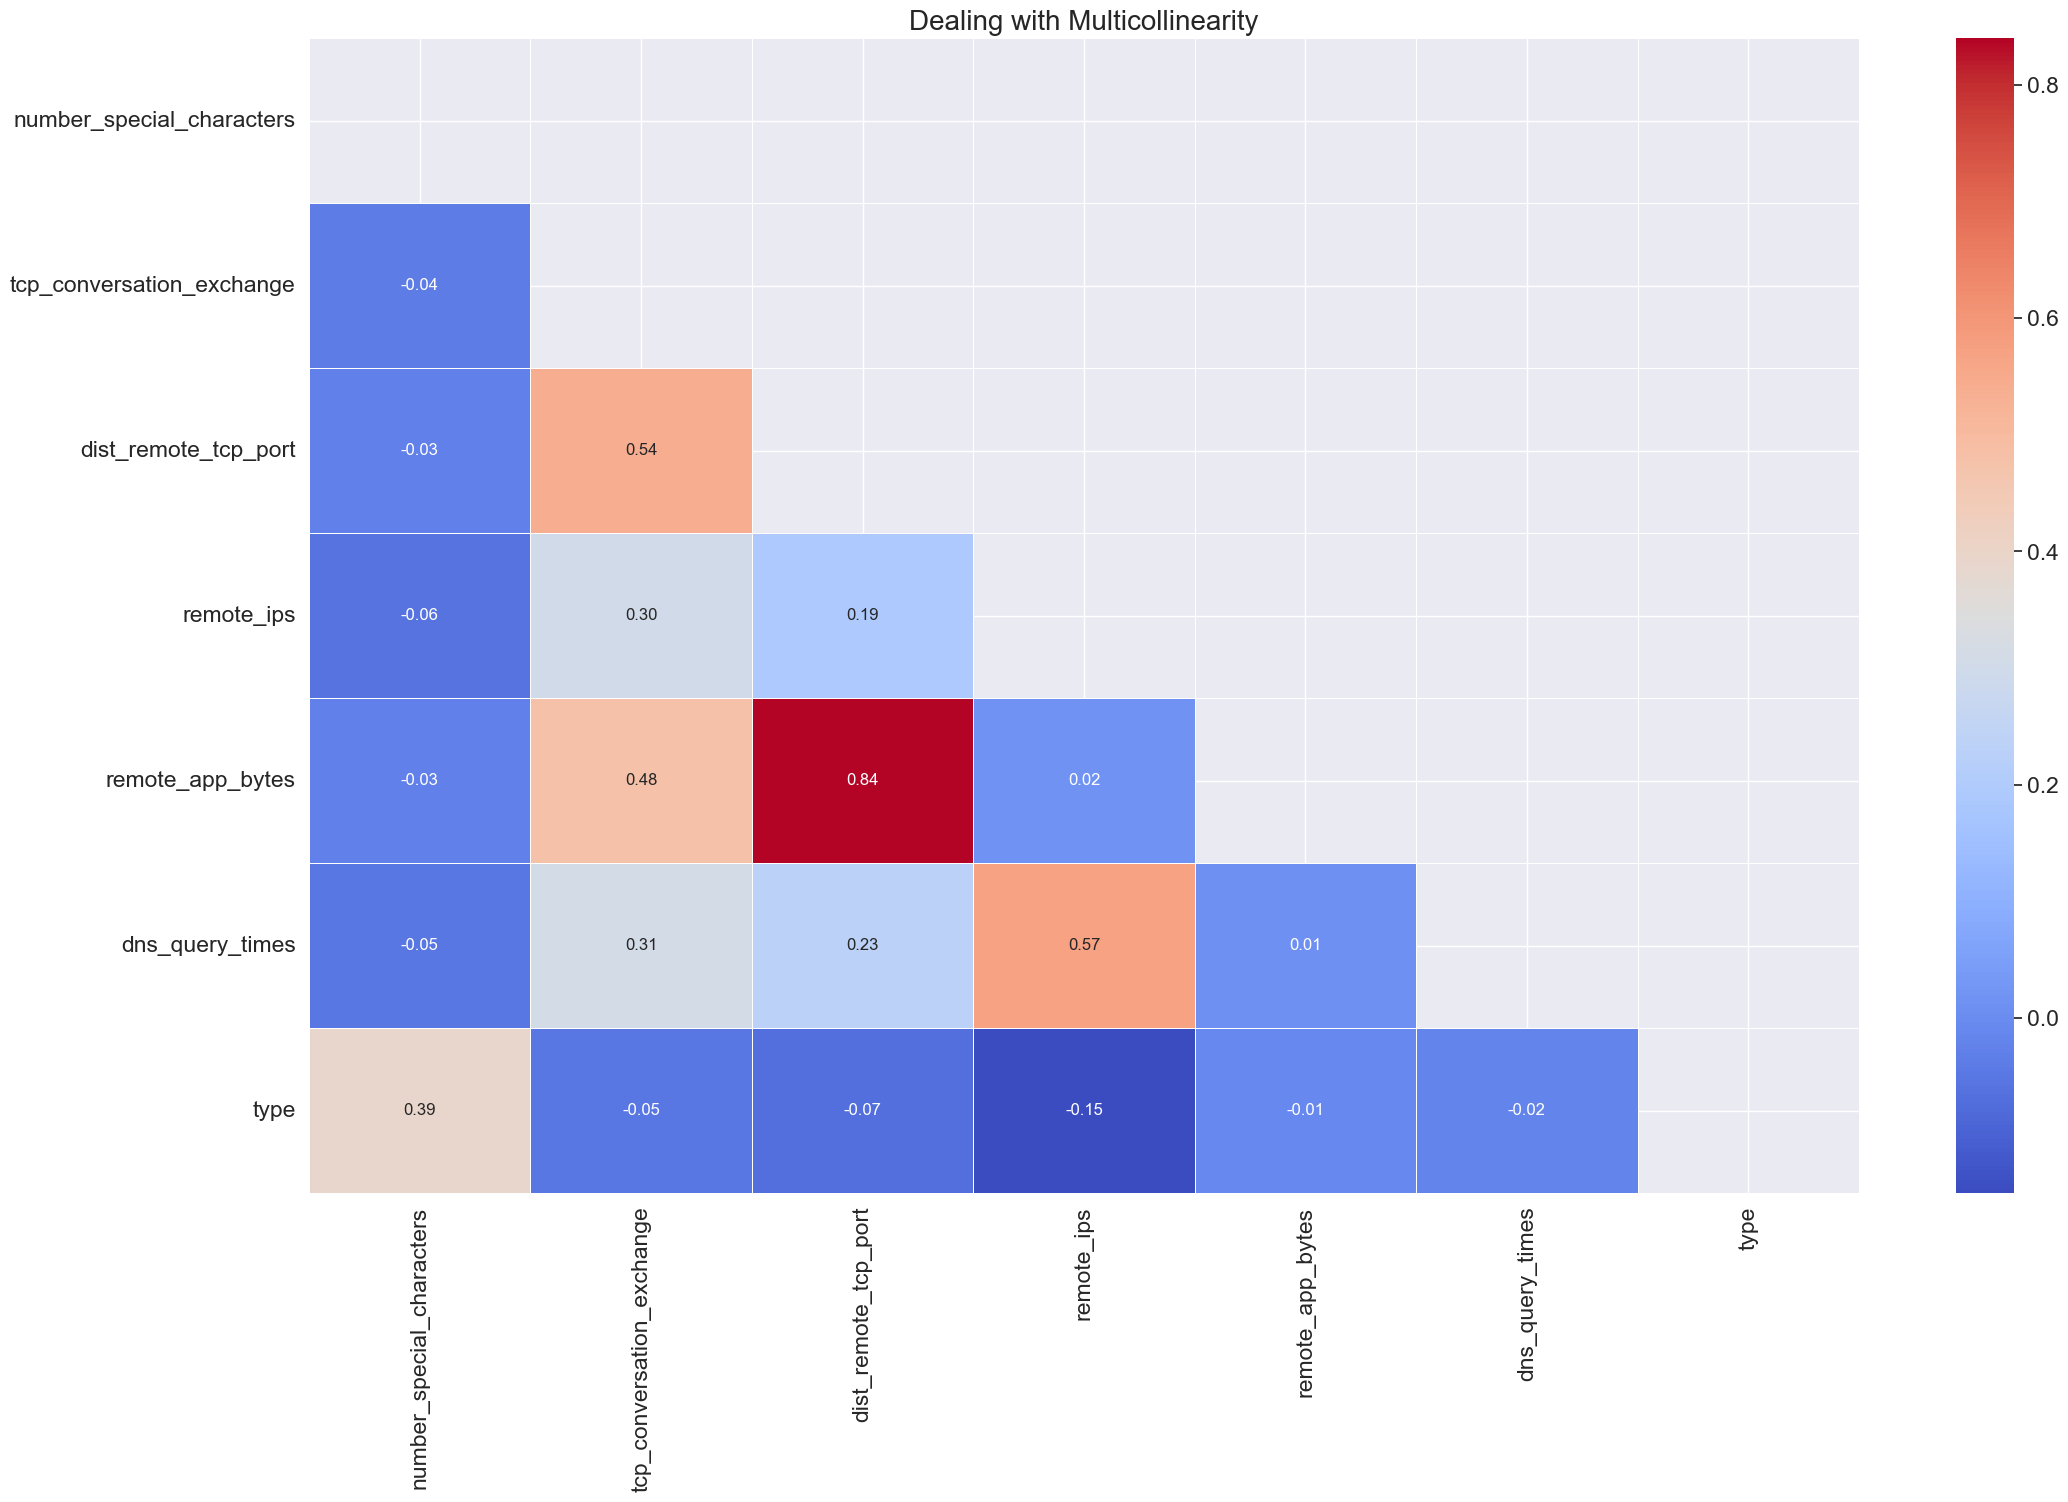

In [24]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_wo_col_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_wo_col_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [25]:
cat["whois_country"].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [26]:
cat["whois_country"] = cat["whois_country"].str.upper().str.strip()

In [27]:
cat["whois_country"] = cat["whois_country"].apply(lambda x: "CY" if x == "CYPRUS" else x)
cat["whois_country"] = cat["whois_country"].apply(lambda x: "GB" if x == "UNITED KINGDOM" else x)
cat["whois_country"] = cat["whois_country"].apply(lambda x: "GB" if x in ["GB", "UK", "[U'GB'; U'UK']"] else x)
cat["whois_country"] = cat["whois_country"].apply(lambda x: "SE" if x == "se" else x)

In [28]:
cat["whois_country"].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [29]:
cat["whois_country"].value_counts().head(10)

whois_country
US    960
CA     75
ES     63
AU     26
GB     22
PA     21
JP     10
IN      8
CZ      8
CN      8
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [30]:
whois_top_10 = cat["whois_country"].value_counts().head(10).index.to_list()
whois_top_10

['US', 'CA', 'ES', 'AU', 'GB', 'PA', 'JP', 'IN', 'CZ', 'CN']

In [31]:
cat["whois_country"] = cat["whois_country"].apply(lambda x: x if x in whois_top_10 else 'OTHER')
cat["whois_country"].value_counts()

whois_country
US       960
CA        75
ES        63
OTHER     56
AU        26
GB        22
PA        21
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [32]:
cat.drop(columns=(["whois_statepro", "whois_regdate", "whois_updated_date"]), inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [33]:
cat.dtypes

url              object
charset          object
server           object
whois_country    object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [34]:
cat.drop("url", axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [35]:
cat.charset.unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [36]:
cat.server.value_counts()

server
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

![Think Hard](../images/think-hard.jpg)

In [37]:
cat["server"] = cat["server"].str.upper().str.strip()

In [38]:
cat.server.value_counts()

server
APACHE                                                                                311
NGINX                                                                                 144
CLOUDFLARE-NGINX                                                                       80
MICROSOFT-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
APACHE/2.4.6 (CENTOS) OPENSSL/1.0.1E-FIPS MOD_FCGID/2.3.9 PHP/5.4.16 MOD_JK/1.2.40      1
MW2114.CODFW.WMNET                                                                      1
MW2199.CODFW.WMNET                                                                      1
FBS                                                                                     1
APACHE/2.2.16 (DEBIAN)                                                                  1
Nam

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [55]:
cat["server"] = cat["server"].apply(lambda x: "MICROSOFT" if "MICROSOFT" in x else ("APACHE" if "APACHE" in x 
                                                                                    else ("NGINX" if "NGINX" in x else
                                                                                         "OTHER")))

In [56]:
cat.server.value_counts()

server
APACHE       491
NGINX        323
OTHER        299
MICROSOFT    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [57]:
website_dummy = pd.get_dummies(cat)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [60]:
website_dummy.head(1)

,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_APACHE,server_MICROSOFT,server_NGINX,server_OTHER,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_CZ,whois_country_ES,whois_country_GB,whois_country_IN,whois_country_JP,whois_country_OTHER,whois_country_PA,whois_country_US
3,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [65]:
website_dummy = website_dummy.astype(int)

In [66]:
df_final = pd.concat([num_wo_col, website_dummy], axis=1)

In [67]:
open_data(df_final)

Data shape is (1257, 29).

number_special_characters      int64
tcp_conversation_exchange      int64
dist_remote_tcp_port           int64
remote_ips                     int64
remote_app_bytes               int64
dns_query_times              float64
type                           int64
charset_ISO-8859-1             int32
charset_UTF-8                  int32
charset_iso-8859-1             int32
charset_us-ascii               int32
charset_utf-8                  int32
charset_windows-1251           int32
charset_windows-1252           int32
server_APACHE                  int32
server_MICROSOFT               int32
server_NGINX                   int32
server_OTHER                   int32
whois_country_AU               int32
whois_country_CA               int32
whois_country_CN               int32
whois_country_CZ               int32
whois_country_ES               int32
whois_country_GB               int32
whois_country_IN               int32
whois_country_JP               int32
whois_count

,number_special_characters,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,remote_app_bytes,dns_query_times,type,charset_ISO-8859-1,charset_UTF-8,charset_iso-8859-1,charset_us-ascii,charset_utf-8,charset_windows-1251,charset_windows-1252,server_APACHE,server_MICROSOFT,server_NGINX,server_OTHER,whois_country_AU,whois_country_CA,whois_country_CN,whois_country_CZ,whois_country_ES,whois_country_GB,whois_country_IN,whois_country_JP,whois_country_OTHER,whois_country_PA,whois_country_US
424,7,0,0,0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
481,8,69,60,5,9350,12.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
814,8,76,3,7,5451,2.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
854,11,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
801,11,61,46,14,7271,8.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [68]:
from sklearn.model_selection import train_test_split

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [70]:
X = df_final.drop("type", axis=1)
y = df_final["type"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 1257.
80% for training data: 1005.
20% for test data: 252.


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
predictions = model.predict(X_test)

In [76]:
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 252.


In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       224
           1       0.75      0.11      0.19        28

    accuracy                           0.90       252
   macro avg       0.82      0.55      0.57       252
weighted avg       0.88      0.90      0.86       252



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

What are your thoughts on the performance of the model? Write your conclusions below.

In [78]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.8968253968253969
Train data accuracy:  0.881592039800995


In [79]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

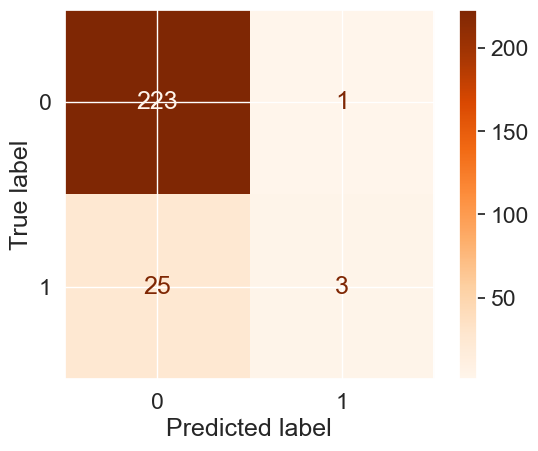

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [50]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [51]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [52]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [53]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [54]:
# Your code here